0.16757202

delta_mu < 1


array([[244.,  91.,  85.],
       [123., 183., 233.],
       [243.,  80.,  71.],
       [247.,  75.,  27.]], dtype=float32)

array([[ 95.587654, 144.94827 , 104.66614 , 129.43724 ],
       [201.22127 , 275.53766 , 192.62918 , 184.15483 ],
       [225.35527 , 291.85956 , 216.50635 , 208.87796 ],
       ...,
       [265.0698  , 317.09146 , 256.37863 , 250.04599 ],
       [264.18744 , 316.73648 , 255.47015 , 249.09837 ],
       [240.3435  , 291.48584 , 232.41557 , 228.3506  ]], dtype=float32)

array([[244.,  91.,  85.],
       [123., 183., 233.],
       [243.,  80.,  71.],
       [247.,  75.,  27.]], dtype=float32)

[87.795456,
 61.229675,
 136.2803,
 108.74515,
 74.8015,
 46.73761,
 166.28699,
 29.530182,
 85.851105,
 41.732574,
 164.98117,
 26.735321,
 91.81125,
 35.679718,
 164.9111,
 33.2883,
 94.75145,
 33.008865,
 165.0897,
 35.393204,
 96.49356,
 33.457947,
 165.23917,
 36.171566,
 97.6456,
 33.752274,
 165.32367,
 36.695793,
 98.51909,
 33.971466,
 165.37677,
 37.131027,
 99.29237,
 34.186844,
 165.42125,
 37.506844,
 99.904526,
 34.342606,
 165.47665,
 37.805313,
 100.399,
 34.479797,
 165.53265,
 38.041138,
 100.806076,
 34.590088,
 165.59128,
 38.223633,
 101.10254,
 34.669495,
 165.65266,
 38.33396,
 101.35266,
 34.73941,
 165.70895,
 38.416504,
 101.59003,
 34.801865,
 165.76178,
 38.501167,
 101.77289,
 34.843277,
 165.82881,
 38.559494,
 101.936356,
 34.88246,
 165.87515,
 38.599136,
 102.09215,
 34.93013,
 165.92258,
 38.633057,
 102.215805,
 34.9619,
 165.9627,
 38.666603,
 102.324036,
 34.979828,
 166.00198,
 38.691605,
 102.44789,
 35.003815,
 166.04588,
 38.72944,
 102.57637,
 

/Users/joeylemon/opt/miniconda3/envs/cs425/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


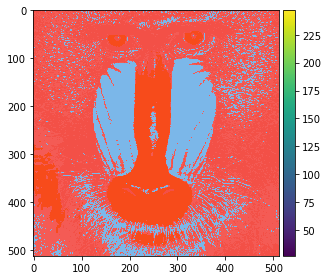

In [33]:
from IPython.display import display
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans


MAX_ITERATIONS = 24


def kmeans(x, k):
    # randomly choose k centroids from the data points
    centroids = x[np.random.choice(len(x), size=k, replace=False)]
     
    # calculate the distance between centroids and all data points
    distances = euclidean_distances(x, centroids)

    display(centroids)
    display(distances)
     
    # assign each data point to the closest centroid
    labels = np.array([np.argmin(i) for i in distances])

    deltas = []
    finished = False

    for _ in range(MAX_ITERATIONS):
        new_centroids = [None] * k

        for i in range(k):
            # update centroids by taking the mean of its cluster
            mu = x[labels==i].mean(axis=0)

            # delta mu is the largest change in either R, G, or B values
            delta_mu = max(
                abs(centroids[i][0] - mu[0]), 
                abs(centroids[i][1] - mu[1]), 
                abs(centroids[i][2] - mu[2]))

            # if we only change this centroid by < 1 in any RGB value, we can finish
            if delta_mu < 1:
                finished = True

            deltas.append(delta_mu)
            new_centroids[i] = mu
 
        new_centroids = np.vstack(new_centroids)
         
        distances = euclidean_distances(x, new_centroids)
        labels = np.array([np.argmin(i) for i in distances])

        if finished:
            print("found delta_mu < 1")
            break
         
    return centroids, labels, deltas


# def dist(a, b):
#     """ Get 3D Euclidean distance between a and b. """
#     return ((b[0]-a[0])**2 + (b[1]-a[1])**2 + (b[2]-a[2])**2)**0.5


# def min_dist(centroids, rgb):
#     """ Get the index of the centroid closest to the given RGB value. """
#     min_i = None
#     min_dist = float("inf")
#     for i in range(len(centroids)):
#         dist_to_centroid = dist(centroids[i], rgb)
#         if dist_to_centroid < min_dist:
#             min_i = i
#             min_dist = dist_to_centroid
#     return min_i


def k_means(data, K):
    # randomly choose k centroids from the data points
    centroids = data[np.random.choice(len(data), size=K, replace=False)]
    deltas = []
    labels = None

    finished = False
    for _ in range(MAX_ITERATIONS):
        distances = euclidean_distances(data, centroids)

        # assign each data point to closest centroid
        labels = np.array([np.argmin(i) for i in distances])

        for k in range(K):
            cluster_points = data[labels==k]

            # get mean r, g, and b values (axis=0)
            mu = cluster_points.mean(axis=0)

            # get the max difference in a r,g, or b value
            delta_mu = abs((centroids[k] - mu).max())
            deltas.append(delta_mu)

            if delta_mu < 1:
                display(delta_mu)
                print("delta_mu < 1")
                finished = True
            
            # update the kth centroid to the new mean value
            centroids[k] = mu

        if finished:
            break

    return centroids, labels, deltas


def reduce_image_v2(img, n_colors):
    """
    Apply K-means clustering to the given image (ndarray) with
    K=n_colors. Return the ndarray representing the reduced image.
    """
    # d (depth) will always be 3 due to RGB values
    w, h, d = img.shape

    # convert the image into a 2D array, where pixels[0] gets [r,g,b]
    # for the top-left and pixels[w*h] gets [r,g,b] for bottom-right
    pixels = np.float32(img.reshape((-1,d)))

    k_means(pixels, n_colors)

    centroids, labels, deltas = kmeans(pixels, n_colors)
    display(centroids)
    display(deltas)

    # update each pixel in the original image with its new classification
    pixels = np.array([centroids[i] for i in labels])

    # convert the 2D array back to 3D so it can be understood by skimage/plt
    # pixels[0][0] gets [r,g,b] at top-left, pixels[w][h] gets [r,g,b] at bottom-right
    pixels = np.int32(pixels.reshape((w, h, d)))

    return pixels, deltas, labels


def reduce_image(img, n_colors):
    """
    Apply K-means clustering to the given image (ndarray) with
    K=n_colors. Return the ndarray representing the reduced image.
    """
    # d (depth) will always be 3 due to RGB values
    w, h, d = img.shape

    # convert the image into a 2D array, where pixels[0] gets [r,g,b]
    # for the top-left and pixels[w*h] gets [r,g,b] for bottom-right
    pixels = np.float32(img.reshape((-1,d)))

    km = KMeans(n_clusters=n_colors)
    km.fit(pixels)

    rgb_vals = km.cluster_centers_
    labels = km.labels_

    # update each pixel in the original image with its new classification
    pixels = np.array([rgb_vals[i] for i in labels])

    # convert the 2D array back to 3D so it can be understood by skimage/plt
    # pixels[0][0] gets [r,g,b] at top-left, pixels[w][h] gets [r,g,b] at bottom-right
    pixels = np.int32(pixels.reshape((w, h, d)))

    mu = [40, 30, 32, 28, 25, 22, 20, 16, 14, 13, 11, 10, 7, 6, 5, 4, 3, 2, 1]

    return pixels, mu, labels


def plot_image_comparison(name, img_arr):
    """
    Plot a 2x2 image comparison with the given array of images.
    img_arr is a list of tuples with format (img, title) where
    img is an ndarray and title is a str.
    """

    if len(img_arr) != 4:
        raise ValueError('img array must be of len 4')

    plt.clf()
    fig = plt.figure(figsize=(7, 7))
    rows, columns = (2, 2)

    for i, (img, title) in enumerate(img_arr):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img, vmin=0, vmax=255)
        plt.axis("off")
        plt.title(title)

    plt.savefig(f"{name}/comparison.jpeg")


def plot_centroid_movement(name, mu_arr):
    """
    Plot a line graph showing centroid movement. mu_arr is a list
    of tuples with format (mu_vals, title, color).
    """
    plt.clf()

    for mu, label, color in mu_arr:
        x, y = list(range(len(mu))), mu
        plt.plot(x, y, color=color, label=label)

    plt.title("Centroid Movement Convergence")
    plt.xlabel("Iteration")
    plt.ylabel("Max Change")
    plt.legend(loc="upper right")
    plt.savefig(f"{name}/centroid_convergence.jpeg")


def plot_cluster_distributions(name, dist_arr):
    """
    Plot a histogram showing cluster distributions. dist_arr is a
    list of tuples with format (labels, title, xticks).
    """
    plt.clf()

    # create subplots with 1 row and len(dist_arr) columns
    fig, axs = plt.subplots(1, len(dist_arr), sharey=True)
    fig.suptitle("Cluster Distributions")
    fig.text(0.04, 0.5, 'Relative Cluster Size', va='center', rotation='vertical')

    for i, (dist, title, xticks) in enumerate(dist_arr):
        # go from [0...n] to [1...n+1]
        dist = dist + 1

        # set weights so sum of each bin adds to 100
        weights = 100 * np.ones_like(dist) / dist.size

        # plot the histogram
        axs[i].hist(dist, weights=weights)
        axs[i].set_xticks(xticks)
        axs[i].set_title(title)

    plt.savefig(f"{name}/cluster_distributions.jpeg")


def perform_comparison(filename):
    """
    Compare the given image file with a 2x2 figure for the
    original image and the K=4, K=16, and K=32 images
    """
    basename = filename.split(".")[0]
    os.mkdir(basename)

    img = io.imread(filename)
    img4, mu4, labels4 = reduce_image(img, n_colors=4)
    img16, mu16, labels16 = reduce_image(img, n_colors=16)
    img32, mu32, labels32 = img16, mu16, labels16

    plot_image_comparison(basename, [
        (img, "Original Image"), 
        (img4, "Image Obtained for K=4"), 
        (img16, "Image Obtained for K=16"), 
        (img32, "Image Obtained for K=32")])

    plot_centroid_movement(basename, [
        (mu4, "K=4", "red"), 
        (mu16, "K=16", "blue"), 
        (mu32, "K=32", "green")])

    plot_cluster_distributions(basename, [
        (labels4, "K=4", [1,2,3,4]),
        (labels16, "K=16", [1,8,16]),
        (labels32, "K=32", [1,8,16,32])])


# perform_comparison("baboon.jpeg")

img = io.imread("baboon.jpeg")
pixels, deltas, labels = reduce_image_v2(img, n_colors=4)
io.imshow(pixels)